In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.spatial.distance as sp
from matplotlib.mlab import PCA

In [55]:
def print_2Dmnist_Clusters(X,K,C,title,location):
        markers = iter(['<','s','o','^','*','v','1','2','3','4'])
        colors = np.array(['b','g','r','c','m','y','k','gray','orange','darkgreen'])
        n = np.arange(K)
        for i in n:
            ex = C.Clusters[i].members
            plt.scatter(x=X[ex,0], y = X[ex,1],color = colors[i],marker = next(markers))
        plt.title(title)
        plt.xticks([], [])
        plt.yticks([], [])
        art = []
        plt.savefig(location ,dpi=900,additional_artists=art,bbox_inches="tight")
        plt.show()

In [56]:
class cluster(object):
    def __init__(self,centroid=None):
        self.centroid = centroid
        self.members = None
        
    def set_data(self,members,data):
        self.members = members
        self.centroid = self.center_mass(data)
        
    def center_mass(self,data):
        if(data[self.members,:].shape[0] == 0):
            return self.centroid
        else:
            r = np.mean(data[self.members,:],axis = 0)
        return r
    def local_loss(self,X):
        local_data = np.copy(X[self.members,:])
        count = 0
        tmp_loss = np.zeros_like(self.centroid)
        for i in np.arange(self.members.shape[0]):
            tmp_loss = tmp_loss + np.square(local_data[i,:]-self.centroid)
        return np.sum(tmp_loss) 

class K_means(object):
    def __init__(self,X,K,max_iter = 50,seed = 123):
        self.Clusters = np.empty([K],dtype = object)
        self.X = X
        self.K = K
        self.max_iter = max_iter
        self.seed = seed
        self.loss = []
    def train(self):
        np.random.seed(self.seed)
        n = self.X.shape[0]
        #Initialize clusters to random points in the data
        Ck = np.random.choice(np.arange(n),size=self.K,replace = False)
        err = 0
        loss_prev = 0
        loss_cur = 0
        #Initialize the cluster objects
        for i, c in zip(np.arange(self.K),Ck):
            self.Clusters[i] = cluster(self.X[c,:])
        
        for j in np.arange(self.max_iter):   
            self.clusterize()
            loss_cur = self.get_loss()
            err = np.abs(loss_cur-loss_prev)
            loss_prev = loss_cur
            self.loss.append(loss_cur)
            if j % 10 == 0:
                print("Iteration",j,end="\t")  
                print("Loss",loss_cur)           
            if err == 0:
                break                
    def clusterize(self):
        n = self.X.shape[0]
        cluster_min = float('inf')
        cluster_index = -1
        index = np.zeros(n,dtype = int)
        for i in np.arange(n):
            dist = 0
            for c in np.arange(self.K):
                dist = np.linalg.norm(self.X[i,:]-self.Clusters[c].centroid)
                if dist <= cluster_min:
                    cluster_min  = dist
                    cluster_index = c
            #Store the cluster label for each point
            index[i] = int(cluster_index)
            cluster_min = float('inf')
            cluster_index = -1
        #Modify cluster structures with new center and members
        count = 0
        for c in np.arange(self.K):
            self.Clusters[c].set_data(np.where(index==c)[0],self.X)
    
    def get_loss(self):
        n = self.Clusters.shape[0]
        count = 0
        tmp_loss = 0
        for i in np.arange(n):
            count = count+1
            tmp_loss = tmp_loss + self.Clusters[i].local_loss(self.X)
        return tmp_loss

In [57]:
mnist_loc = "../Data"

In [58]:
X = np.loadtxt(mnist_loc + "/MNIST_2D_Train.csv")

In [59]:
K=10
s=123
M = 40
C=K_means(X,K,max_iter = M,seed =s)
C.train()

Iteration 0	Loss 12584590.9299
Iteration 10	Loss 8192084.61513
Iteration 20	Loss 8081921.54632
Iteration 30	Loss 7947584.26282


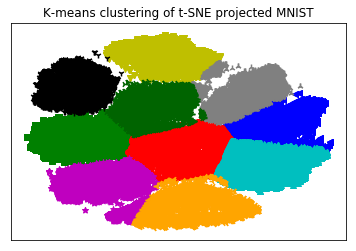

In [60]:
location = "../Slides/Images/2D_MNIST_Cluster"
title = "K-means clustering of t-SNE projected MNIST"
print_2Dmnist_Clusters(X,K,C,title,location)

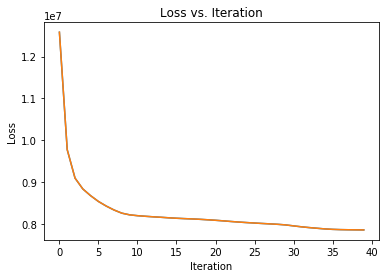

In [64]:
plt.title("Loss vs. Iteration")
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.plot(np.arange(M),C.loss)
plt.savefig("../Slides/Images/ClusterLoss",dpi=900,bbox_inches="tight")
plt.show()
plt.close()